## Packages Required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ydata_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

Before we start performing exploring the data, we set some styles for better visualizations. These will help the visualizations to be more clear and easier to read.

In [2]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

Now we load the dataset into our dataframe in order to starting exploring it with the following line of code.

In [3]:
data = pd.read_csv('../Dataset/cleaned_merged_heart_dataset.csv')

## **Basic Information**

The following lines of code provide some basic information about our dataset:

1. **First 10 rows**  
   The first line displays the first 10 rows of the dataset, allowing us to get a better understanding of the data.

2. **Concise summary**  
   The second line uses `data.info()` to show a concise summary of the dataset, including:
   - The number of rows and columns
   - Column names and their data types
   - Number of non-missing values in each column
   - Memory usage
3. **Statistical summary**  
   `data.describe()` provides a statistical summary of the numerical columns in the DataFrame, including:
   - Count (number of non-missing values)
   - Mean (average)
   - Standard deviation (spread of values)
   - Minimum and maximum values
   - 25th, 50th (median), and 75th percentiles

4. **Missing values check**  
   The fourth line sums all the null values in the dataset. In our case, this returns `0`, indicating that there are no missing values.


In [4]:
display(data.head(10))
display(data.info())
display(data.describe())
display(data.isnull().sum())

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       602 non-null    int64  
 1   sex       602 non-null    int64  
 2   cp        602 non-null    int64  
 3   trestbps  602 non-null    int64  
 4   chol      602 non-null    int64  
 5   fbs       602 non-null    int64  
 6   restecg   602 non-null    int64  
 7   thalachh  602 non-null    int64  
 8   exang     602 non-null    int64  
 9   oldpeak   602 non-null    float64
 10  slope     602 non-null    int64  
 11  ca        602 non-null    int64  
 12  thal      602 non-null    int64  
 13  target    602 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 66.0 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,54.473422,0.684385,1.961794,131.637874,248.450166,0.151163,0.744186,149.270764,0.337209,1.073256,1.473422,0.707641,3.387043,0.485050
std,9.039576,0.465147,1.486557,17.509164,51.552293,0.358505,0.812347,23.122436,0.473150,1.156289,0.624080,0.982835,1.827329,0.500192
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,244.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.750000,0.000000,1.000000,165.750000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Class Balance Analysis

### Key Insights:

- The dataset shows a **relatively balanced distribution** between the two classes
- **51.9%** of patients have no heart attack (313 cases)
- **48.1%** of patients have heart attack (290 cases)
- This balanced distribution is **ideal for machine learning models** that we will use as it reduces class imbalance issues
- No significant class imbalance problem exists, so we likely won't need techniques like SMOTE or class weighting
- With nearly equal representation, the model can learn patterns from both classes effectively


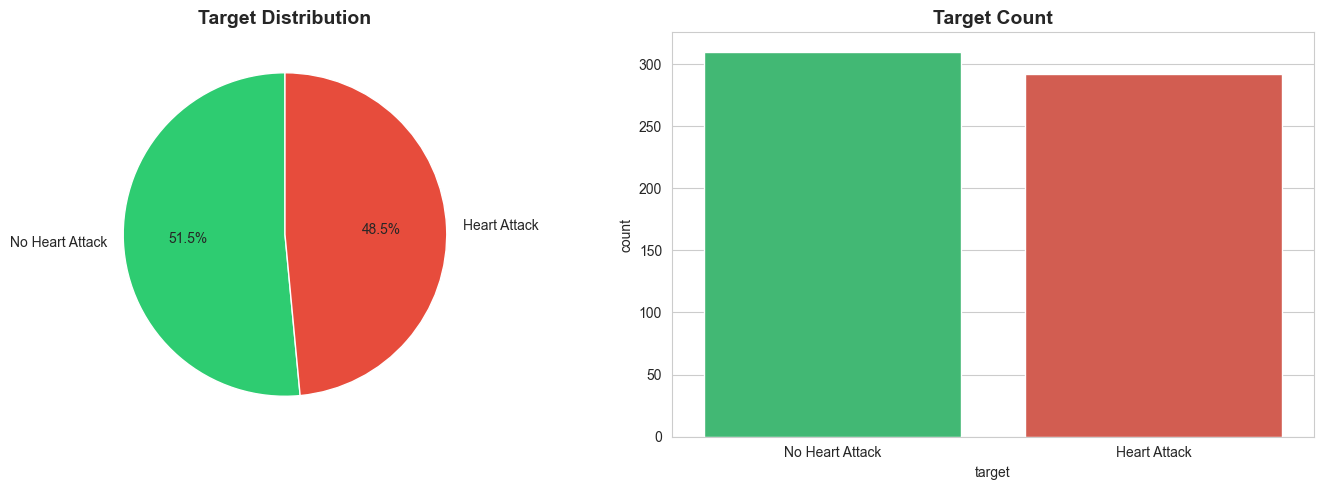

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].pie(data['target'].value_counts(), labels=['No Heart Attack', 'Heart Attack'], 
            autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c'])
axes[0].set_title('Target Distribution', fontsize=14, fontweight='bold')

sns.countplot(x='target', data=data, palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title('Target Count', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['No Heart Attack', 'Heart Attack'])

plt.tight_layout()
plt.show()

## Demographic Features Analysis

### Key Insights:

**Age Distribution:**
- The average age of patients is **54.5 years**
- Age distribution shows a **normal/bell-shaped curve** centered around 54-58 years
- Most patients fall in the **45-65 age range**, which is a typical age group for heart disease risk
- The boxplot shows **similar median ages** for both groups (heart attack vs no heart attack)
- Age alone may not be a strong differentiator between the two classes

**Sex Distribution:**
- The dataset is **heavily male-dominated** with approximately **68% male patients** (~410) and **32% female patients** (~190)
- This reflects real-world patterns where cardiovascular studies often have more male participants
- **Gender imbalance** should be considered when interpreting model results

**Heart Attack by Sex:**
- **Males** show a **nearly equal split** between heart attack and no heart attack cases (~210 vs ~200)
- **Females** also show a **balanced distribution** between both classes (~90 vs ~90)
- Interestingly, the heart attack rate appears **consistent across both genders** (approximately 50% each)
- Despite having fewer female patients, the **heart attack prevalence is similar** for both sexes in this dataset
- This suggests that **sex alone may not be a strong predictor**, though it should still be included in the model

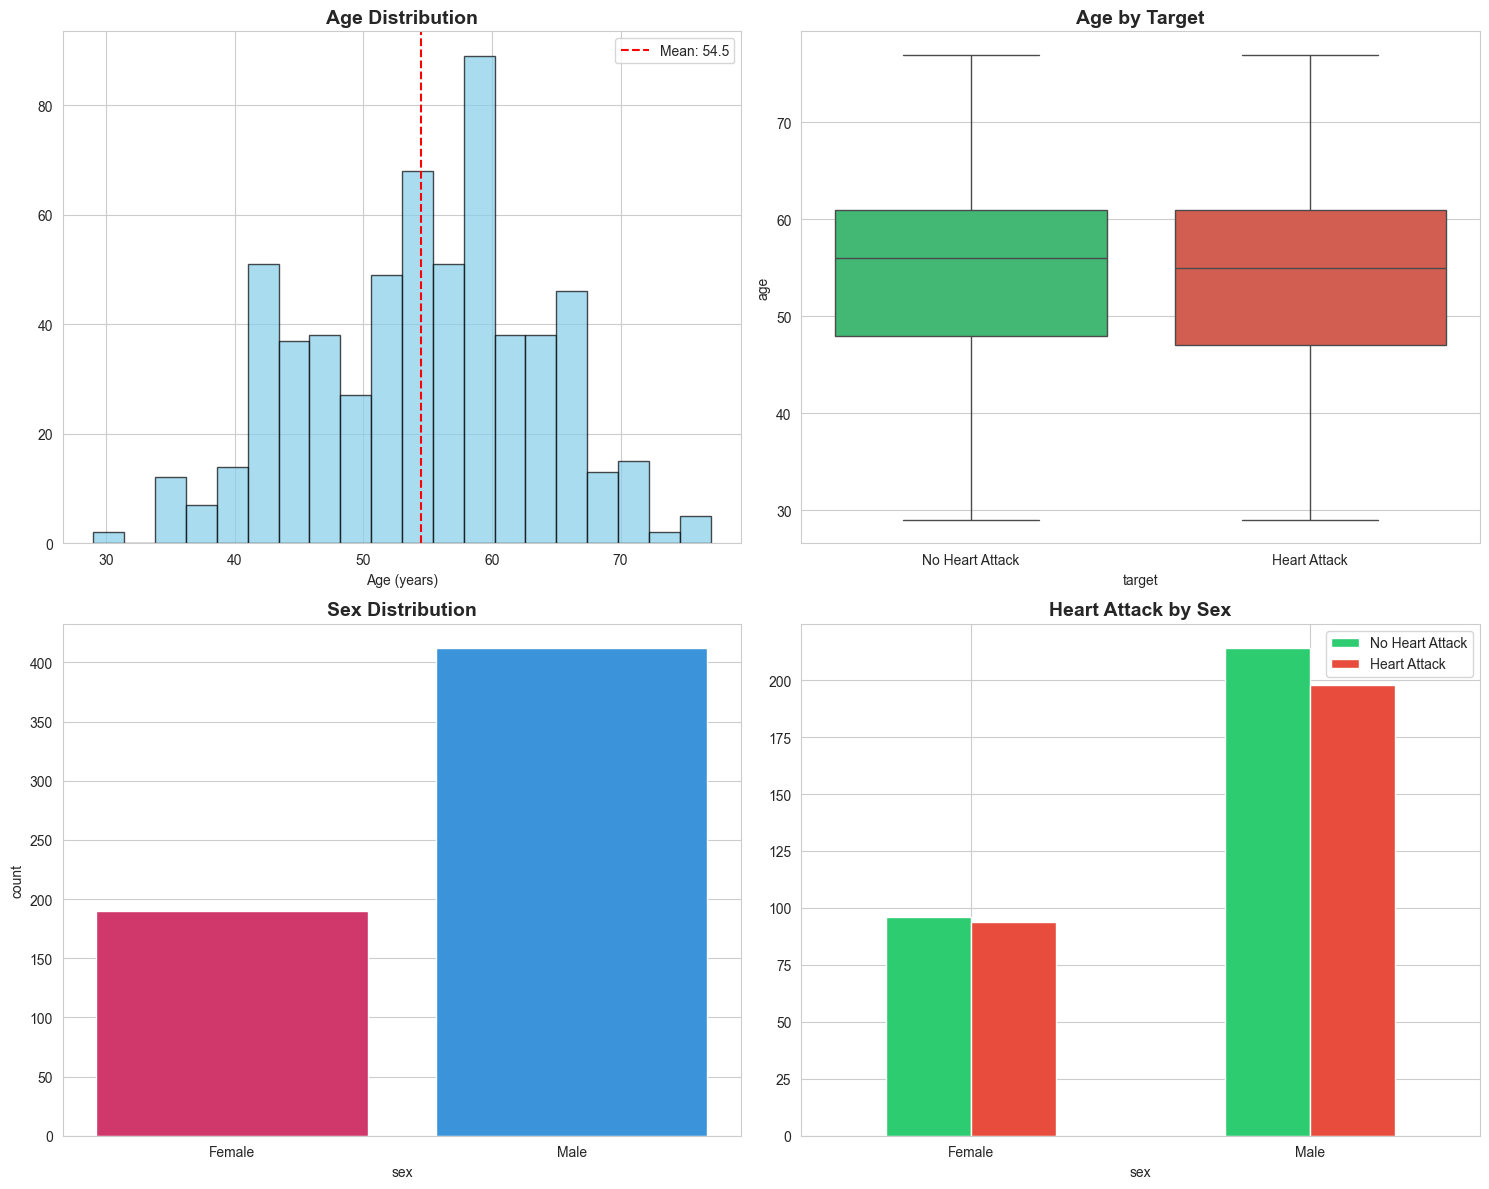

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution
axes[0, 0].hist(data['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].axvline(data['age'].mean(), color='red', linestyle='--', label=f'Mean: {data["age"].mean():.1f}')
axes[0, 0].legend()

# Age by target
sns.boxplot(x='target', y='age', data=data, palette=['#2ecc71', '#e74c3c'], ax=axes[0, 1])
axes[0, 1].set_title('Age by Target', fontsize=14, fontweight='bold')
axes[0, 1].set_xticklabels(['No Heart Attack', 'Heart Attack'])

# Sex distribution
sns.countplot(x='sex', data=data, palette=['#e91e63', '#2196f3'], ax=axes[1, 0])
axes[1, 0].set_title('Sex Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xticklabels(['Female', 'Male'])

# Heart attack by sex
pd.crosstab(data['sex'], data['target']).plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=axes[1, 1])
axes[1, 1].set_title('Heart Attack by Sex', fontsize=14, fontweight='bold')
axes[1, 1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1, 1].legend(['No Heart Attack', 'Heart Attack'])

plt.tight_layout()
plt.show()

## Correlation Analysis


### Understanding the Heatmap:
- **Red colors** indicate positive correlations (when one increases, the other tends to increase)
- **Blue colors** indicate negative correlations (when one increases, the other tends to decrease)
- **White/Gray colors** indicate weak or no correlation
- Values range from **-1 to +1** (closer to -1 or +1 means stronger correlation)

### Key Insights:

**Strongest Positive Correlations with Heart Attack (target):**
1. **cp (Chest Pain Type): 0.54** - Strongest predictor! Certain chest pain types are highly associated with heart attacks
2. **thal (Thalassemia): 0.14** - Blood disorder shows moderate positive correlation
3. **slope: 0.32** - ST segment slope during exercise is a good indicator

**Strongest Negative Correlations with Heart Attack (target):**
1. **thalachh (Max Heart Rate): -0.38** - Lower maximum heart rate achieved is associated with heart attacks
2. **exang (Exercise Induced Angina): -0.39** - Exercise-induced chest pain inversely correlates
3. **oldpeak (ST Depression): -0.34** - ST depression during exercise shows negative relationship

**Important Feature Relationships:**
- **thalachh and exang (-0.39)**: Patients with exercise-induced angina tend to have lower max heart rates
- **exang and oldpeak (0.27)**: Exercise angina correlates with ST depression
- **cp and thal (0.54)**: Strong relationship between chest pain type and thalassemia

**Weak Correlations:**
- **age (-0.03)**: Surprisingly, age shows almost no direct correlation with heart attack in this dataset
- **sex (-0.01)**: Gender also shows minimal direct correlation
- **fbs (Fasting Blood Sugar)**: Very weak correlations across the board

### Model Building Implications:
- **cp, thalachh, exang, oldpeak, and slope** should be prioritized as they show the strongest correlations
- Features like **age, sex, and fbs** may have less predictive power individually
- Consider feature interactions as age and sex might work in combination with other features
- The diagonal shows perfect correlation (1.00) as expected - each feature with itself


target      1.000000
slope       0.318541
cp          0.221884
thal        0.141963
restecg     0.129800
thalachh    0.044157
chol        0.002746
trestbps   -0.000619
sex        -0.013163
fbs        -0.019852
age        -0.032471
ca         -0.042752
oldpeak    -0.044565
exang      -0.052484
Name: target, dtype: float64

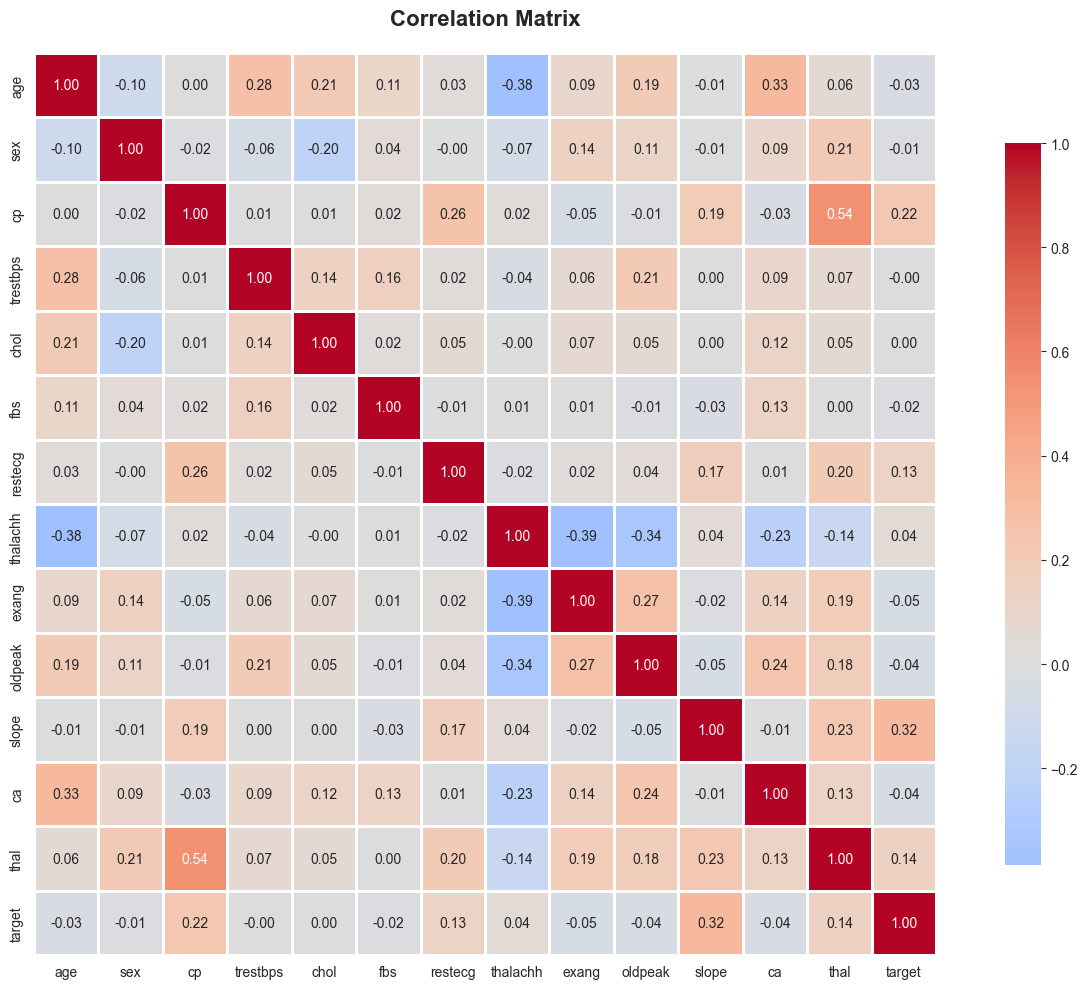

In [7]:
# Correlation with target
display(data.corr()['target'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## Clinical Features by Target


### Understanding Boxplots:
- **Box**: Contains 50% of the data (25th to 75th percentile)
- **Line inside box**: Median value
- **Whiskers**: Min/max values (excluding outliers)
- **Circles**: Outliers
- **0 = No Heart Attack, 1 = Heart Attack**

### Key Insights:

**Age by Target:**
- **Similar distributions** for both groups - age is not a strong differentiator
- Median age is approximately **55 years** for both classes
- Wide overlap indicates age alone cannot predict heart attacks well

**Blood Pressure by Target:**
- **Slightly higher median** for heart attack patients (~130 vs ~125 mm Hg)
- Multiple outliers present in both groups (patients with hypertension)
- Distributions largely overlap - **weak predictor on its own**

**Cholesterol by Target:**
- **Nearly identical distributions** between both groups
- Median around **240-250 mg/dl** for both
- Cholesterol shows **minimal separation** - surprising but consistent with correlation analysis
- Several extreme outliers (>500 mg/dl) in both groups

**Max Heart Rate by Target:**
- Heart attack patients have **noticeably lower max heart rates** (median ~140 bpm)
- No heart attack patients achieve **higher max heart rates** (median ~160 bpm)
- Clear separation with less overlap - **strong predictor**
- Confirms the strong negative correlation (-0.38) seen in the correlation matrix

### Takeaway:
**Max heart rate (thalachh)** is the strongest clinical indicator among these four features, while age and cholesterol show minimal discriminative power.


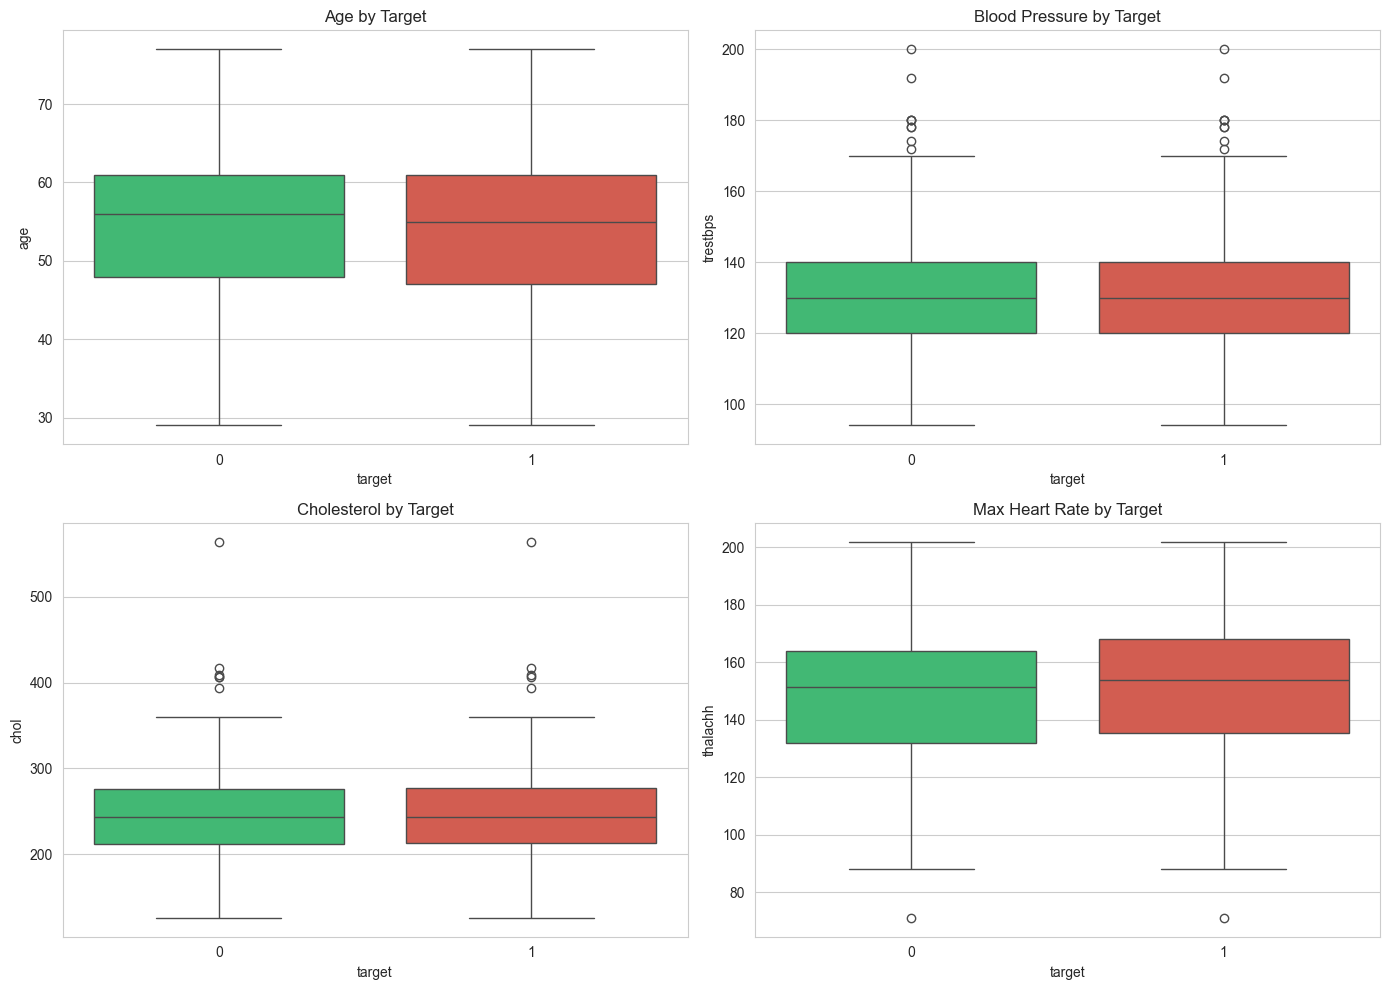

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x='target', y='age', data=data, palette=['#2ecc71', '#e74c3c'], ax=axes[0,0])
sns.boxplot(x='target', y='trestbps', data=data, palette=['#2ecc71', '#e74c3c'], ax=axes[0,1])
sns.boxplot(x='target', y='chol', data=data, palette=['#2ecc71', '#e74c3c'], ax=axes[1,0])
sns.boxplot(x='target', y='thalachh', data=data, palette=['#2ecc71', '#e74c3c'], ax=axes[1,1])
axes[0,0].set_title('Age by Target')
axes[0,1].set_title('Blood Pressure by Target')
axes[1,0].set_title('Cholesterol by Target')
axes[1,1].set_title('Max Heart Rate by Target')
plt.tight_layout()
plt.show()

## Pairplot: Feature Relationships


### What is a Pairplot?
- **Diagonal plots**: Distribution curves showing how each feature is spread
- **Scatter plots**: Show relationships between pairs of features
- **Green dots (0)**: No heart attack patients
- **Red dots (1)**: Heart attack patients

### Key Insights:

**Age:**
- **Heavy overlap** between green and red across all scatter plots
- Both groups cluster around 50-60 years
- **Confirms weak predictive power**

**Blood Pressure (trestbps):**
- Distributions are **nearly identical** for both groups
- No clear separation pattern in scatter plots
- **Not a strong standalone predictor**

**Cholesterol (chol):**
- **Extremely overlapped distributions**
- Similar spread for both classes (200-350 mg/dl)
- Several outliers but **no meaningful pattern**

**Max Heart Rate (thalachh):**
- Red dots (heart attack) tend to cluster at **lower values** (120-160 bpm)
- Green dots (no heart attack) spread toward **higher values** (140-200 bpm)
- Clear visual separation - **strongest predictor**

### Most Important Pattern:
Look at the **thalachh row/column** - you can see **red and green dots separating vertically**, especially against age and blood pressure. This confirms max heart rate is the most discriminative feature.

### Takeaway:
Features show **significant overlap**, meaning **no single feature perfectly separates** the classes. A machine learning model will need to use **combinations of features** to make accurate predictions.

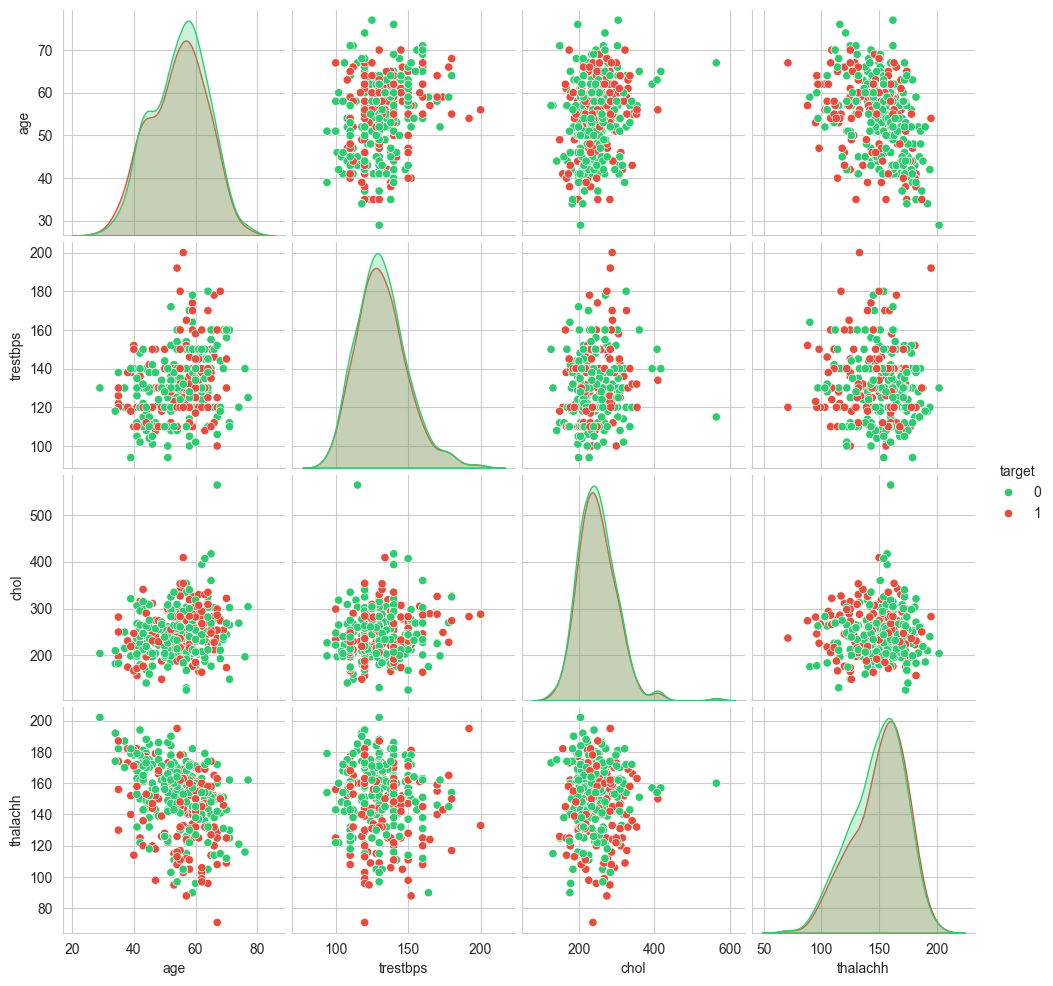

In [9]:
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalachh', 'target']], 
             hue='target', palette=['#2ecc71', '#e74c3c'])
plt.show()


## Categorical Features vs Heart Attack

### What's Shown:
- **Green bars**: No heart attack patients (0)
- **Red bars**: Heart attack patients (1)
- Each chart shows distribution of different categories for each target class

### Key Insights:

**cp (Chest Pain Type)**
- **Type 0**: Massive green bar - strongly indicates NO heart attack
- **Type 2**: More red than green - indicates heart attack risk
- **Type 4**: Almost entirely red - very high heart attack indicator
- **Clear pattern showing different chest pain types predict different outcomes**

**sex (Gender):**
- **Balanced distribution** across both groups for both genders
- Male (1) has more patients overall but similar attack rates
- **Not a strong differentiator** - confirms earlier analysis

**fbs (Fasting Blood Sugar >120 mg/dl):**
- Most patients have **fbs = 0** (normal blood sugar)
- **Very similar distributions** for both classes
- **Weak predictor** - blood sugar doesn't distinguish well

**restecg (Resting ECG Results):**
- **Type 0**: More green (no attack)
- **Type 1**: More red (attack)
- Shows some predictive value but moderate

**exang (Exercise Induced Angina):**
- **exang = 0 (No)**: More green bars - less likely to have heart attack
- **exang = 1 (Yes)**: Roughly equal - those WITH exercise angina show mixed results
- **Moderate predictor**

**slope (ST Segment Slope):**
- **Slope 1**: Heavily green - flat slope indicates lower risk
- **Slope 2**: More red bars - downsloping indicates higher risk
- **Good separation** between classes - strong predictor

### Most Important Features:
1. **cp (Chest Pain Type)** - Best categorical predictor with clear patterns
2. **slope (ST Segment Slope)** - Good separation between classes
3. **restecg & exang** - Moderate predictive power
4. **sex & fbs** - Weak predictors with minimal difference

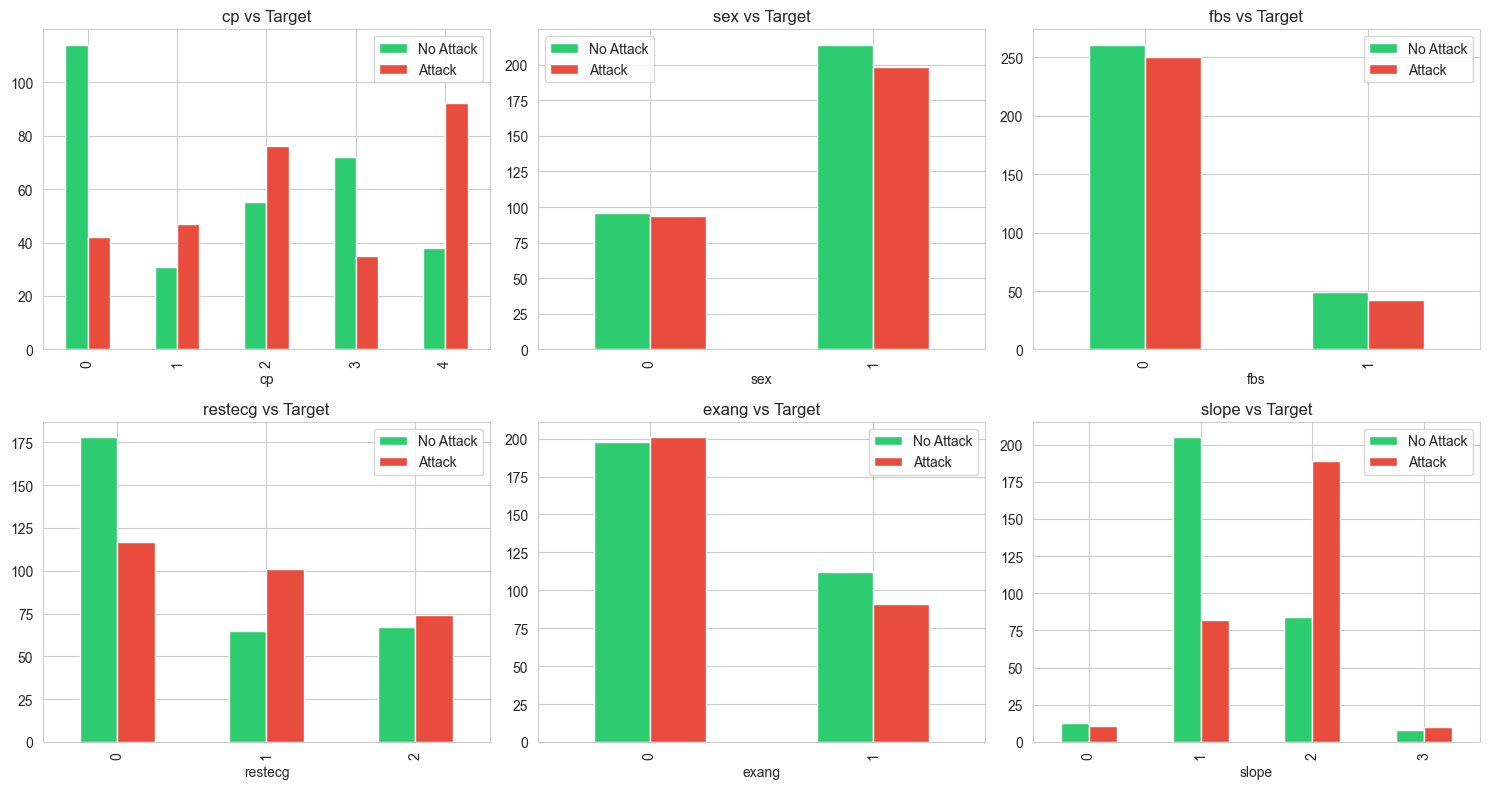

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
categorical = ['cp', 'sex', 'fbs', 'restecg', 'exang', 'slope']
for idx, col in enumerate(categorical):
    pd.crosstab(data[col], data['target']).plot(kind='bar', ax=axes[idx], 
                                                  color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} vs Target')
    axes[idx].legend(['No Attack', 'Attack'])
plt.tight_layout()
plt.show()

## Summary of EDA

### Dataset Overview:
- **603 patients**, **balanced classes** (51.9% vs 48.1%) - no need for SMOTE/resampling
- **No missing values** - ready for training without imputation
- **14 features** with varying predictive power

---

### Feature Importance for Random Forest:

**Strong Predictors (prioritize these):**
1. **cp (Chest Pain Type)**: 0.54 correlation - strongest predictor
2. **thalachh (Max Heart Rate)**: -0.38 correlation - clear separation between classes
3. **slope (ST Segment)**: 0.32 correlation - good categorical predictor
4. **exang (Exercise Angina)**: -0.39 correlation
5. **oldpeak (ST Depression)**: -0.34 correlation

**Weak Predictors (may still help in combinations):**
- age, sex, chol, fbs, trestbps - low individual correlation but Random Forest can find patterns

## Modeling Strategy

### Key Decisions:

1. **80/20 train-test split** - Balanced classes from EDA (51.9%/48.1%) require no stratification or resampling techniques

2. **All 13 features used** - EDA showed even weak predictors (age, sex) may contribute in combinations; RF handles selection via feature importance

3. **Conservative hyperparameters (n_estimators=20, max_depth=5)** - Prevents overfitting given high feature overlap; could increase to 50-100 trees and depth 7-10 for better performance

4. **Random Forest chosen** - Handles mixed data types, captures non-linear relationships and interactions (thalachh-exang: -0.39), robust to outliers, matches EDA-identified strong predictors (cp, thalachh, slope)

---

### Expected Outcome:
- **75-85% accuracy range** likely (strong features but significant overlap)
- **cp and thalachh** will dominate feature importance
- **Age, sex, fbs** may rank low but still contribute marginally

# Prediction Model

## Data Preparation

The dataset is split into features (X) containing all 13 clinical variables and target (y) representing heart attack occurrence (0 = No, 1 = Yes). An 80/20 train-test split (482/121 samples) with random_state=0 ensures reproducibility, and based on EDA's balanced class distribution (51.9% vs 48.1%), no stratification is needed as both splits will naturally maintain representative class proportions for unbiased model evaluation.

In [11]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

## Class Distribution Verification

After splitting, we verify the class distribution using `y_test.unique()` to confirm both classes (0 and 1) are present in the test set, and `Counter(y_train)` to check the exact count of each class in the training set, ensuring the 80/20 split maintained the balanced distribution observed in EDA and that no class is missing from either subset.

In [12]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 245, 1: 236})

## Feature Scaling

StandardScaler is applied to normalize all 13 features by removing the mean and scaling to unit variance, fitted only on the training data to prevent data leakage, which ensures features with different ranges (age: 29-77, cholesterol: 126-564, max heart rate: 71-202) are on comparable scales for consistent model training, though technically optional for Random Forest since it's scale-invariant.

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Model Training

A Random Forest Classifier is instantiated with 20 decision trees (n_estimators=20), maximum depth of 5 to prevent overfitting given the high feature overlap observed in EDA, and random_state=12 for reproducibility, then fitted on the scaled training data where it will automatically learn feature importance and capture non-linear relationships between predictors, with EDA's strongest features (cp, thalachh, slope) expected to dominate the tree splits.

In [14]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)


,n_estimators,20
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model Persistence

Both the trained Random Forest model and the fitted StandardScaler are serialized and saved as pickle files using joblib, ensuring the exact same preprocessing transformation (scaling) can be applied to new data in production, which is critical because the scaler's mean and variance parameters were learned from training data and must be consistently applied to maintain prediction accuracy on unseen patient records.

In [15]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model Saved")

Model Saved


## Model Evaluation

The saved model and scaler are loaded from disk to simulate production deployment, where the test set is transformed using the loaded scaler (transform only, not fit_transform to avoid data leakage), predictions are generated on the scaled test data, and a classification report displays precision, recall, F1-score, and accuracy for both classes, providing comprehensive performance metrics on the 121 unseen patients to validate the model's ability to predict heart attacks based on the EDA-identified predictive features.

In [16]:
# Load model and scaler
loaded_model = joblib.load('random_forest_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Example: make predictions
X_test_scaled = loaded_scaler.transform(X_test)
predictions = loaded_model.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        65
           1       0.87      0.82      0.84        56

    accuracy                           0.86       121
   macro avg       0.86      0.86      0.86       121
weighted avg       0.86      0.86      0.86       121

